In [55]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from pandas.io.json import json_normalize
import os
import json
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import geopandas as gdp
from geopandas import GeoDataFrame
from fiona.crs import from_epsg
import shapely

In [56]:
file_name = 'park_facility/park_facility.shp'
park_shp = GeoDataFrame.from_file(file_name)
park_shp.crs = from_epsg(4326)
park_shp.head()

,Prop_ID,Barbecue,Basketball,Dogfriend,Eateries,Playground,Tennis,skate,gispropnum,area,propname,geometry
0,B018,0,1,1,0,1,0,0,B018,0.796912,Canarsie Park,(POLYGON ((-73.8804756741291 40.63571240115446...
1,B028,0,1,2,0,2,1,0,B028,0.243400,Dyker Beach Park,(POLYGON ((-74.01842481974427 40.6067978207152...
2,B032,1,1,1,0,2,1,0,B032,0.165564,Fort Greene Park,POLYGON ((-73.97359974922539 40.69171771933037...
3,B054,0,1,1,0,1,1,0,B054,0.112753,Lincoln Terrace Park / Arthur S. Somers,(POLYGON ((-73.92493161992556 40.6674028146497...
4,B057,0,2,1,1,4,1,0,B057,0.927570,Marine Park,(POLYGON ((-73.92431008321688 40.5922243351517...


In [57]:
park_shp.tail()

,Prop_ID,Barbecue,Basketball,Dogfriend,Eateries,Playground,Tennis,skate,gispropnum,area,propname,geometry
84,X118,0,1,1,3,2,0,0,X118,0.609223,Soundview Park,POLYGON ((-73.86105326808232 40.81061362459746...
85,X126,2,1,0,0,0,0,0,X126,0.378089,Ferry Point Park,(POLYGON ((-73.82395583843886 40.8173937787382...
86,X142,0,0,1,0,0,0,0,X142,0.154551,Riverdale Park,POLYGON ((-73.91503534192901 40.89700469285231...
87,X147A,0,0,0,0,1,0,0,X147A,0.080253,Starlight Park,POLYGON ((-73.88384281052618 40.83193733530238...
88,X187,0,1,0,0,1,0,0,X187,0.003642,Emile Cavanaugh Triangle,POLYGON ((-73.84277806537111 40.86930058771416...


In [58]:
park_shp.rename(columns={'area':'parkarea'},inplace=True)

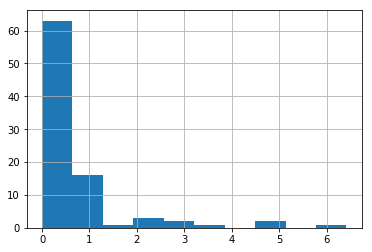

In [59]:
park_shp.parkarea.hist()

In [60]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [61]:
park_shp.columns

Index(['Prop_ID', 'Barbecue', 'Basketball', 'Dogfriend', 'Eateries',
       'Playground', 'Tennis', 'skate', 'gispropnum', 'parkarea', 'propname',
       'geometry'],
      dtype='object')

In [62]:
X = park_shp[['Barbecue', 'Basketball', 'Dogfriend', 'Eateries', 'Playground', 'Tennis', 'skate', 'parkarea']]

In [63]:
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

At 2 clusters, inertia is 516.4774746378714
At 3 clusters, inertia is 413.3900537373384
At 4 clusters, inertia is 334.37279995399786
At 5 clusters, inertia is 278.67701277812097
At 6 clusters, inertia is 235.98487050363144
At 7 clusters, inertia is 200.32944247162123
At 8 clusters, inertia is 174.56659898427577
At 9 clusters, inertia is 156.91117297959184


Text(0.5,1,'Inertia Plot')

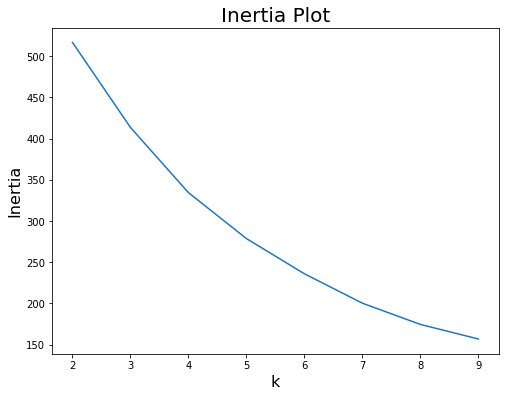

In [64]:
np.random.seed(42)
s = np.zeros(8)
for k in range(0, 8):
    est = KMeans(n_clusters = k+2, n_init = 100)
    est.fit(X_std)
    s[k] = est.inertia_
    print('At {0} clusters, inertia is {1}'.format(k+2, s[k]))
    
plt.figure(figsize=(8, 6))
plt.plot(range(2, 10), s,'-')
plt.xlabel('k', fontsize = 16)
plt.ylabel('Inertia', fontsize = 16)
plt.title('Inertia Plot', fontsize = 20)

In [65]:
cluster = KMeans(n_clusters = 4, n_init=100)
cluster.fit(X_std)
park_shp['cluster_labels'] = cluster.labels_

In [66]:
park_shp.cluster_labels.value_counts()

0    48
3    35
2     5
1     1
Name: cluster_labels, dtype: int64

In [67]:
'Barbecue', 'Basketball', 'Dogfriend', 'Eateries', 'Playground', 'Tennis', 'skate', 'parkarea'

('Barbecue',
 'Basketball',
 'Dogfriend',
 'Eateries',
 'Playground',
 'Tennis',
 'skate',
 'parkarea')

In [68]:
for i in range(0,4):
    group = park_shp[park_shp['cluster_labels'] == i]
    print('Group ' + str(i) + ':')
    print('    Barbecue: ' + str(round(group.Barbecue.mean(),2)))
    print('    Basketball: ' + str(round(group.Basketball.mean(),2)))
    print('    Dogfriend: ' + str(round(group.Dogfriend.mean(),2)))
    print('    Eateries: ' + str(round(group.Eateries.mean(),2)))
    print('    Playground: ' + str(round(group.Playground.mean(),2)))
    print('    Tennis: ' + str(round(group.Tennis.mean(),2)))
    print('    Skate: ' + str(round(group.skate.mean(),2)))
    print('    Park Area: ' + str(round(group.parkarea.mean(),2)))

Group 0:
    Barbecue: 0.15
    Basketball: 0.5
    Dogfriend: 0.33
    Eateries: 0.6
    Playground: 1.12
    Tennis: 0.08
    Skate: 0.02
    Park Area: 0.23
Group 1:
    Barbecue: 0.0
    Basketball: 2.0
    Dogfriend: 1.0
    Eateries: 43.0
    Playground: 21.0
    Tennis: 2.0
    Skate: 2.0
    Park Area: 3.78
Group 2:
    Barbecue: 5.2
    Basketball: 1.4
    Dogfriend: 1.2
    Eateries: 5.8
    Playground: 4.6
    Tennis: 1.4
    Skate: 0.4
    Park Area: 3.45
Group 3:
    Barbecue: 0.69
    Basketball: 1.83
    Dogfriend: 1.06
    Eateries: 1.0
    Playground: 3.54
    Tennis: 0.8
    Skate: 0.03
    Park Area: 0.79


In [69]:
park_shp[park_shp['cluster_labels'] == 1]

,Prop_ID,Barbecue,Basketball,Dogfriend,Eateries,Playground,Tennis,skate,gispropnum,parkarea,propname,geometry,cluster_labels
16,M010,0,2,1,43,21,2,2,M010,3.780427,Central Park,(POLYGON ((-73.97352914629933 40.7637663777088...,1


In [70]:
park_shp[park_shp['cluster_labels'] == 2]

,Prop_ID,Barbecue,Basketball,Dogfriend,Eateries,Playground,Tennis,skate,gispropnum,parkarea,propname,geometry,cluster_labels
7,B073,12,0,1,1,7,1,1,B073,2.168220,Prospect Park,POLYGON ((-73.96291204766092 40.66049598042057...,2
30,M104,6,0,1,0,0,1,0,M104,1.070471,Randalls Island,POLYGON ((-73.91639482528774 40.79772646189507...,2
50,Q099,2,4,1,16,8,1,1,Q099,2.970916,Flushing Meadows Park,(POLYGON ((-73.83298014349137 40.7272137315585...,2
78,X039,4,2,1,7,4,2,0,X039,6.414880,Pelham Bay Park,(POLYGON ((-73.82541241594278 40.8565841413174...,2
83,X092,2,1,2,5,4,2,0,X092,4.649833,Van Cortlandt Park,(POLYGON ((-73.88739116885324 40.8861844398141...,2


In [71]:
park_shp[park_shp['cluster_labels'] == 0]

,Prop_ID,Barbecue,Basketball,Dogfriend,Eateries,Playground,Tennis,skate,gispropnum,parkarea,propname,geometry,cluster_labels
0,B018,0,1,1,0,1,0,0,B018,0.796912,Canarsie Park,(POLYGON ((-73.8804756741291 40.63571240115446...,0
6,B068,0,1,0,0,1,0,0,B068,0.195894,Prospect Park,"POLYGON ((-73.9677809621198 40.64970900795083,...",0
9,B125,0,1,0,0,1,0,0,B125,0.393720,Dreier-Offerman Park,POLYGON ((-73.99602441549752 40.58215541155328...,0
10,B126,1,1,0,3,1,0,0,B126,0.227753,Red Hook Recreation Area,(POLYGON ((-74.00377143374747 40.6706127694941...,0
12,B169,0,0,0,1,0,0,1,B169,0.859092,Coney Island Beach & Boardwalk,(POLYGON ((-73.95668881653906 40.5753834669936...,0
15,M005,0,0,0,4,1,0,0,M005,0.106660,Battery Park,(POLYGON ((-74.0127993578551 40.70201518036098...,0
17,M027,0,0,0,0,1,0,0,M027,0.000281,Downing Playground,POLYGON ((-74.00247312362416 40.72977248604904...,0
19,M029,0,1,1,1,2,0,0,M029,0.328437,Fort Tryon Park,(POLYGON ((-73.93380041477089 40.8573481289407...,0
21,M039,0,0,0,2,0,0,0,M039,0.036050,Harlem River Park,POLYGON ((-73.93411327579591 40.81540780534919...,0
24,M058,0,1,1,0,3,0,0,M058,0.105072,Marcus Garvey Memorial Park,POLYGON ((-73.94230232837236 40.80550420267756...,0


In [72]:
park_shp.to_csv('park_shp_clusters.csv')